# **Card Fraud Detection**

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns
import numpy as np
from sklearn.metrics import plot_confusion_matrix

In [85]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [12]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
print("The total length of sales dataset is = ",len(df))


The total length of sales dataset is =  284807


In [14]:
df.duplicated().sum() # dulicates should be remove before moving forward. 

1081

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
dfDescribe = df.describe()
dfDescribe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


#### Distribution of all variables

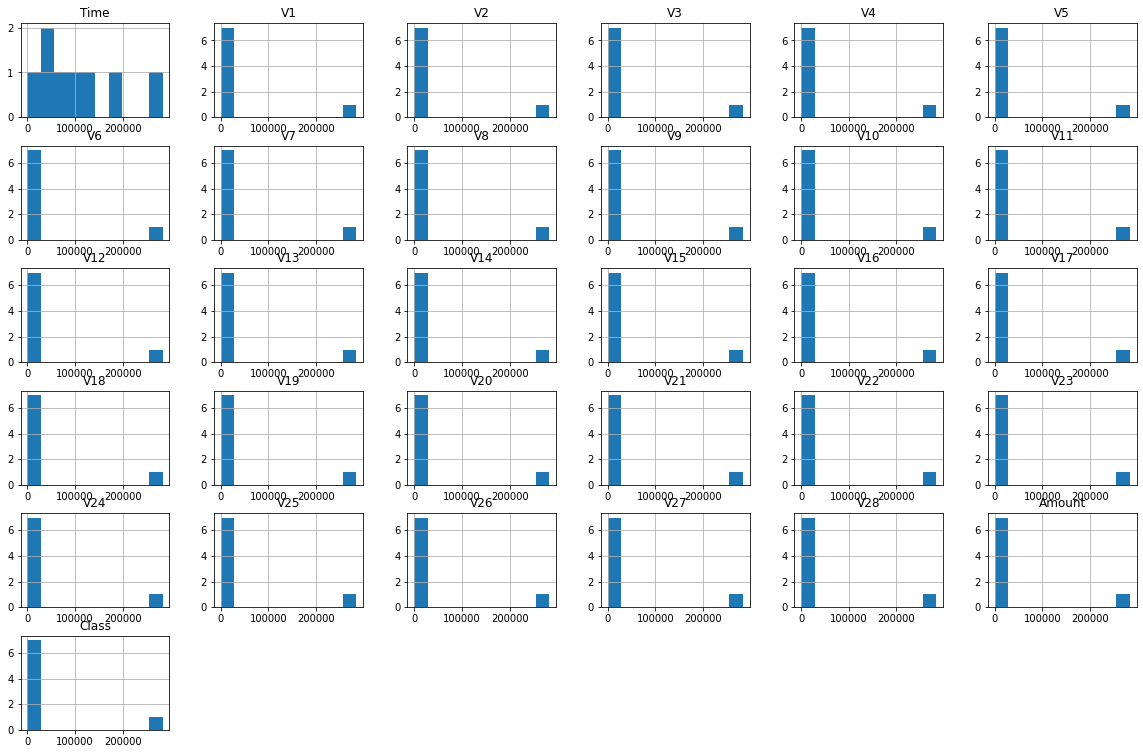

In [18]:
dfDescribe.hist(figsize = (20,13))
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

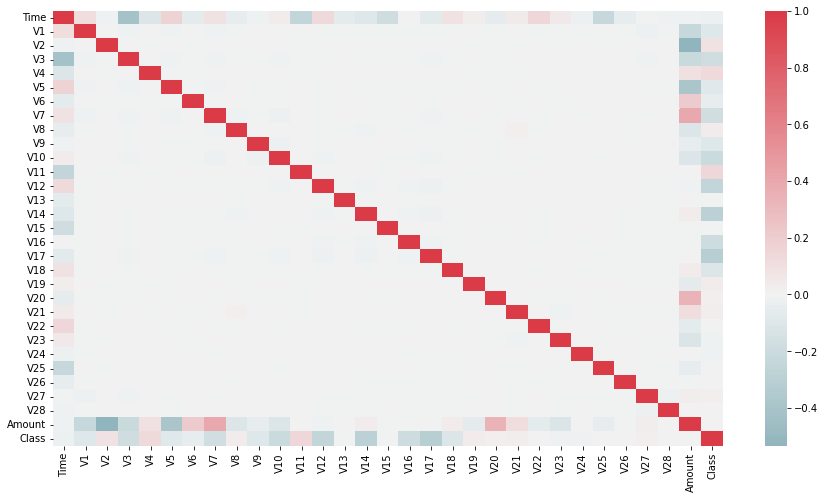

In [21]:
plt.figure(figsize=(15,8))
corr = df.corr()
Ms = np.zeros_like(corr)
sns.heatmap(corr,center = 0,mask =Ms,cmap = sns.diverging_palette(210, 10, as_cmap=True))
plt.show()

### Number of entries with 1 and 0 Classes

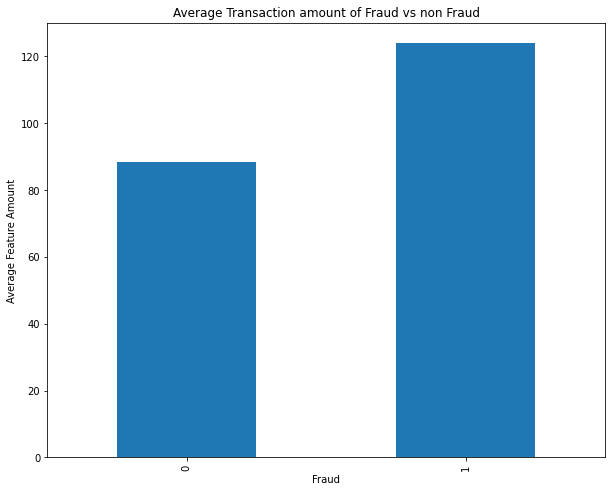

In [23]:
plt.figure(figsize = (10,8))
dfFraud = df.groupby("Class")['Amount'].mean().plot(kind = 'bar',title="Average Transaction amount of Fraud vs non Fraud",xlabel="Fraud",ylabel="Average Feature Amount")

In [24]:
print("The number of class 1 and 0 is =:", df.groupby("Class")['Class'].count())

The number of class 1 and 0 is =: Class
0    283253
1       473
Name: Class, dtype: int64


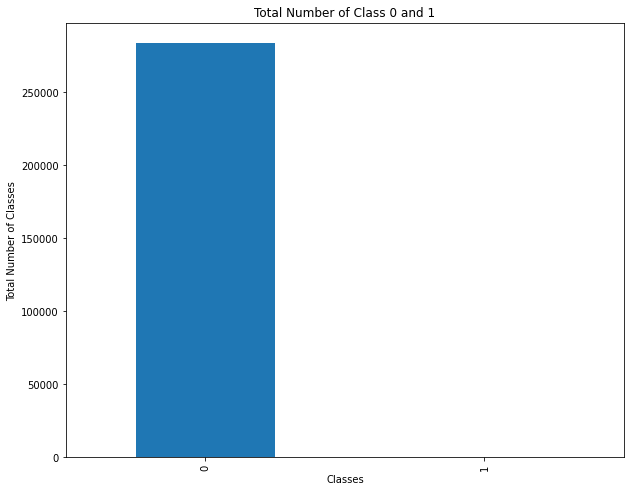

In [25]:
plt.figure(figsize = (10,8))
dfFraud = df.groupby("Class")['Class'].count().plot(kind = 'bar',title="Total Number of Class 0 and 1",xlabel="Classes",ylabel="Total Number of Classes")

## Modeling

In [48]:
df.groupby("Class")['Class'].count()


Class
0    284315
1       492
Name: Class, dtype: int64

### Handling Class Inbalancing:

In [49]:
Fraud = len(df[df['Class'] == 1])
NonFraud = len(df[df['Class'] == 0])
class_distribution_ratio = NonFraud/Fraud
class_distribution_ratio

577.8760162601626

In [50]:
import random
import numpy

In [51]:
dataClass1 = pd.DataFrame(df[df["Class"]==1])
dataClass0 = df[df["Class"]==0]

In [52]:
Class0Sampel = pd.DataFrame(dataClass0.sample(1000))

In [53]:
len(dataClass1)

492

In [54]:
dfBalance = pd.concat([Class0Sampel,dataClass1],axis = 0)

In [55]:
dfBalance.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
108002,70709.0,-1.374912,0.798765,-1.707117,-2.674925,1.445206,2.975923,-0.739841,1.662762,-1.174421,...,-0.386375,-0.684116,0.087914,1.028632,-0.292719,0.865962,0.321586,0.205222,20.00,0
252931,156032.0,-0.810182,1.451854,-0.274951,-0.610306,0.019138,-1.043629,0.387605,-0.572277,0.006384,...,0.515373,-0.845374,0.228535,0.030507,-0.389204,0.149962,0.273787,0.096450,8.99,0
118180,74978.0,-1.279437,1.427728,-0.874649,-1.178420,1.775056,3.244573,-0.596523,1.798112,-0.666302,...,-0.229677,-0.949903,0.053614,0.979302,0.061529,0.095975,0.132661,0.037862,9.84,0
240327,150555.0,2.032743,0.390253,-1.918774,1.191227,0.884116,-0.548031,0.348750,-0.310753,0.141070,...,0.075991,0.376480,-0.108632,-1.141769,0.340929,-0.470707,0.031996,-0.023807,26.82,0
148349,89736.0,-0.256897,1.191070,-0.960923,0.000231,3.818879,3.562825,0.952670,0.439452,-0.726147,...,-0.473447,-1.146283,-0.349903,0.446022,0.618131,-0.660143,-0.420066,-0.461596,18.89,0


In [56]:
df = dfBalance.sample(frac=1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42769,41237.0,-10.281784,6.302385,-13.271718,8.925115,-9.975578,-2.832513,-12.703253,6.706846,-7.078424,...,2.479414,0.366933,0.042805,0.478279,0.157771,0.329901,0.163504,-0.485552,118.30,1
21159,31509.0,-1.346672,-0.832025,0.217632,-1.174158,3.520170,2.850929,-0.620670,1.064892,-0.047465,...,-0.129554,-0.832191,0.162629,1.006941,0.016820,0.141952,0.014584,0.137753,31.33,0
149357,91075.0,-1.855061,1.554964,-1.405809,0.669327,-0.280230,1.178652,-3.459979,-2.815155,1.242229,...,-0.095308,0.946629,-0.297403,-0.368344,0.198731,-0.078591,0.366709,0.073767,38.76,1
6870,8757.0,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,...,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.00,1
129632,79162.0,1.158664,0.074420,0.567623,0.514243,-0.436013,-0.341495,-0.190709,0.131028,-0.061689,...,-0.177547,-0.572396,0.192142,0.188050,0.049075,0.097939,-0.023529,0.005111,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240327,150555.0,2.032743,0.390253,-1.918774,1.191227,0.884116,-0.548031,0.348750,-0.310753,0.141070,...,0.075991,0.376480,-0.108632,-1.141769,0.340929,-0.470707,0.031996,-0.023807,26.82,0
102461,68212.0,1.164037,0.151525,0.481566,0.675761,-0.419482,-0.748696,0.074461,-0.111551,0.008286,...,-0.144122,-0.417217,0.135194,0.404556,0.191802,0.181260,-0.022381,0.018126,20.97,0
273666,165644.0,2.071719,-0.283303,-0.721419,0.099530,-0.216544,-0.252149,-0.471691,-0.032795,1.412868,...,-0.188256,-0.400726,0.226604,-1.065968,-0.232127,-0.861287,0.057358,-0.037692,1.00,0
125521,77701.0,0.862105,-1.961209,-0.250274,-0.926754,-1.583573,-0.896163,-0.148929,-0.463598,-2.016581,...,0.012549,-0.179043,-0.402933,0.454396,0.587071,-0.104788,-0.042222,0.071945,360.40,0


## Decision Tree

In [57]:
X = df.iloc[:,0:30]
Y = df.iloc[:,-1]

In [58]:
Y = Y.values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

# Create Decision Tree classifer object
Classifier = DecisionTreeClassifier()

In [88]:
# Train Decision Tree Classifer
Classifier = Classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = Classifier.predict(X_test)

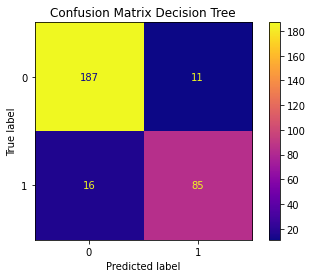

In [89]:
plot_confusion_matrix(Classifier,X_test, y_test,cmap='plasma')
plt.title("Confusion Matrix Decision Tree")
plt.show()

In [90]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9096989966555183


### Naive Bayes Classification Model

In [91]:
from sklearn.naive_bayes import GaussianNB


In [92]:

model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

X_train.shape, X_test.shape

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [93]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

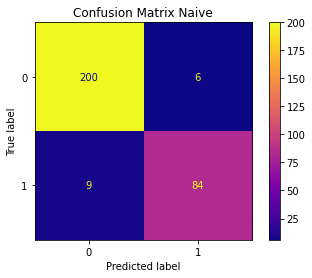

In [94]:
plot_confusion_matrix(model,X_test, y_test,cmap='plasma')
plt.title("Confusion Matrix Naive")
plt.show()

In [95]:
print('The Naive bases model accuracy score is: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


The Naive bases model accuracy score is: 0.9498


## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression


In [97]:
X = df.iloc[:,10:25]
Y = df.iloc[:,-1]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

In [99]:
LogModel = LogisticRegression()

LogModel.fit(X_train, y_train)

LogisticRegression()

In [103]:
y_pred = LogModel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.94


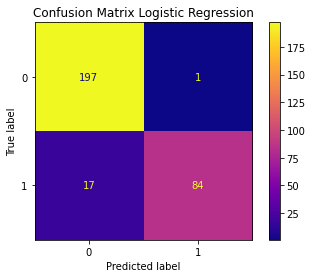

In [101]:
plot_confusion_matrix(LogModel,X_test, y_test,cmap='plasma')
plt.title("Confusion Matrix Logistic Regression")
plt.show()

In [116]:
ModelAccuracy = ["Decision Tree", "Naive", "Logistic Regressoin"]
Values = [91,95,94]

In [117]:
data = pd.DataFrame()

In [118]:
data['Model'] = ModelAccuracy
data["Accuracy"] = Values

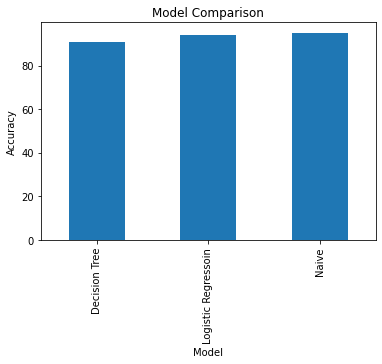

In [119]:
data.groupby("Model")['Accuracy'].sum().plot(kind ='bar')
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()